In [91]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

np.random.seed(42)

# Linear Regression 

### The normal equation

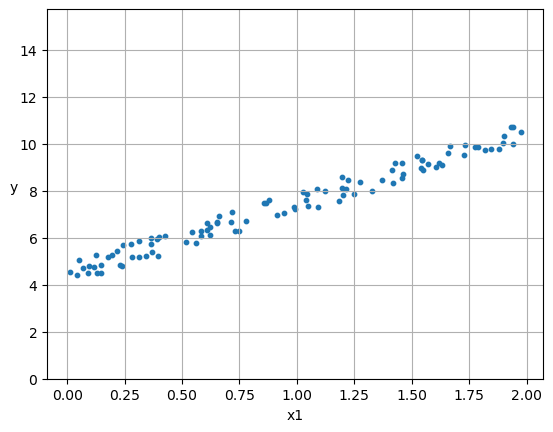

In [2]:
# Generating a linear-looking dataset to test the normal equation on

m = 100

# column vector
X = 2 * np.random.rand(m, 1)

# the random addition at the end is for adding noise
y = 4 + 3 * X + np.random.rand(m, 1)

plt.scatter(X, y, s=10)
plt.ylim(0, max(y) + 5)

plt.grid()
plt.xlabel("x1")
plt.ylabel("y", rotation=0)

plt.show()


In [3]:
# Adds another column of all ones 
X_b = add_dummy_feature(X)

# the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print (theta_best)

# Our actual equation for y is: y = 4 + 3 * X + np.random.rand(m, 1). The parameters we got back form the normal equation 
# are 4.59 and 2.89 which are close estimations for 4 and 3. The reason for not getting exactly 3 and 4 is due to the noise
# that we added to the dataset

[[4.51359766]
 [2.98323418]]


[[ 4.51]
 [10.48]]
[ 4. 10.]


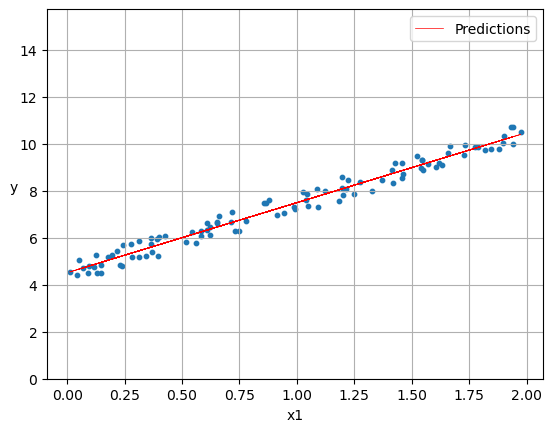

In [4]:
# Now we can use theta we got to make predictions

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_actual = 4 + 3 * X_new_b[:,1]
print (y_predict.round(2))
print (y_actual)

# Plot the model's predictions
y_hat = X_b @ theta_best

plt.scatter(X, y, s=10)
plt.plot(X, y_hat, color='red', label="Predictions", linewidth=0.5)
plt.ylim(0, max(y) + 5)

plt.grid()
plt.legend()
plt.xlabel("x1")
plt.ylabel("y", rotation=0)

plt.show()



In [5]:
# Using the sklearn LinearRegression model to do the same thing. It's based on Numpy's least square function
# (np.linalg.lstsq)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# b and p1 of the parameter vector (sklearn separates them)
print (lin_reg.intercept_, lin_reg.coef_)

y_hat = lin_reg.predict(X)

[4.51359766] [[2.98323418]]


# Linear Regression 

### Batch gradient descent

In [12]:
# Updating theta after computing the theta updates for the entire training set

epochs = 100
step = 0.1
m = len(X_b)
theta = np.random.rand(X_b.shape[1], 1)

for _ in range(epochs):
  theta_updates = (2/m) * X_b.T @ (X_b @ theta - y)
  theta = theta - step * theta_updates

theta


array([[4.47156213],
       [3.02034926]])

### Stochastic gradient descent

In [28]:
epochs_n = 50
theta = np.random.randn(X_b.shape[1], 1)
t0, t1 = 5, 50

def learning_rate(t):
  return t0 / (t + t1)

for epoch in range(epochs_n):
  for iteration in range(m):
    random_idx = np.random.randint(m)
    xi = X_b[random_idx : random_idx + 1] #.reshape(1,2)
    yi = y[random_idx :random_idx + 1]

    grad = 2 * xi.T @ (xi @ theta - yi)
    step = learning_rate(epoch * m + iteration)
    theta = theta - step * grad


print (theta)


[[4.5063351 ]
 [2.97553146]]


### Batch gradient descent

In [33]:
epochs_n = 50
theta = np.random.randn(X_b.shape[1], 1)
batch_size = 20
step = 0.1

for epoch in range(epochs_n):
  for iteration in range(m):
    indices = np.random.permutation(m)[:batch_size]    
    X_batch = X_b[indices]
    y_batch = y[indices]

    grad = (2/m) * X_batch.T @ (X_batch @ theta - y_batch)
    theta = theta - step * grad

print (theta)

[[4.50626074]
 [2.96572263]]


# Polynomial Regression

Text(0, 0.5, 'y')

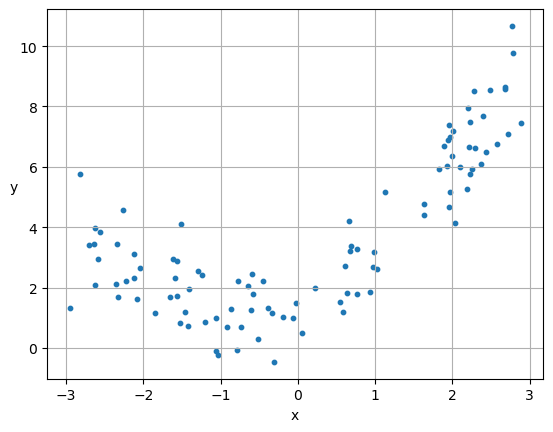

In [47]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X, y, s=10)
plt.grid()
plt.xlabel("x")
plt.ylabel("y", rotation=0)

### Adding polynomial features (manually, then using sklearn)

In [60]:
print (X.shape)
print (X[:5])

# Adding polynomial features manually
X_poly = np.c_[X, X[:,0]**2]
print (X_poly.shape)
print (X_poly[:5])

# Adding polynomial features using sklearn
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print (X_poly.shape)
print (X_poly[:5])

(100, 1)
[[ 2.36642095]
 [-0.39036428]
 [ 1.93375732]
 [ 0.77030015]
 [ 1.94486975]]
(100, 2)
[[ 2.36642095  5.59994809]
 [-0.39036428  0.15238427]
 [ 1.93375732  3.73941739]
 [ 0.77030015  0.59336232]
 [ 1.94486975  3.78251834]]
(100, 2)
[[ 2.36642095  5.59994809]
 [-0.39036428  0.15238427]
 [ 1.93375732  3.73941739]
 [ 0.77030015  0.59336232]
 [ 1.94486975  3.78251834]]


In [76]:
# Now we can use Linear regression on this data 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, 'y')

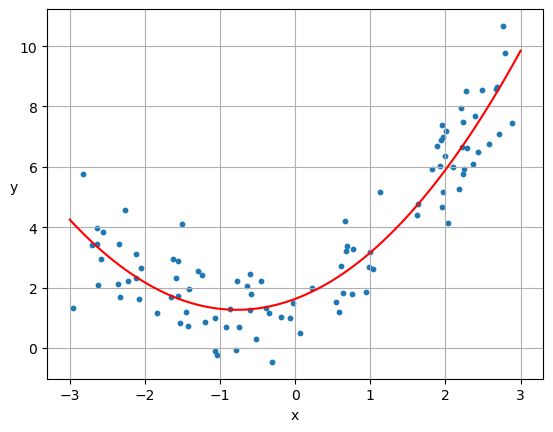

In [80]:
# Generating a curve to match the data
X_new = np.linspace(-3, 3, len(X_poly)).reshape(len(X_poly), 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y, s=10)
plt.plot(X_new, y_new, "r-")

plt.grid()
plt.xlabel("x")
plt.ylabel("y", rotation=0)

In [81]:
print (lin_reg.intercept_, lin_reg.coef_)

# The model predicts a curve: y = 1.62 + 0.93*x1 + 0.6*x2
# while the real curve (see above) is y = 2 + X + 0.5*X^2 + noise

[1.62498384] [[0.93275856 0.60282595]]


# Learning Curves

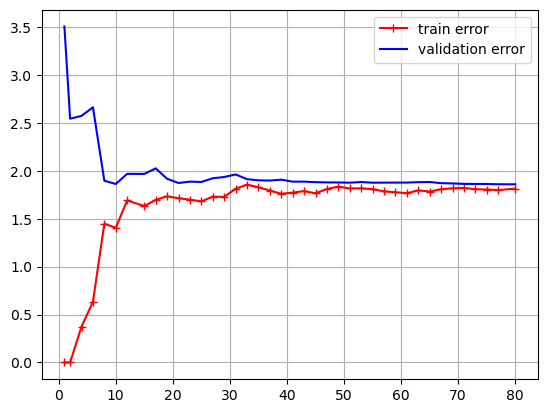

In [90]:
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, 
                                                         train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")

# Each iteration is done 5 times because of CV. We take the average error
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", label="train error")
plt.plot(train_sizes, valid_errors, "b-", label="validation error")

plt.grid()
plt.legend()

# Regularized Linear Models

### Ridge regression (L2 norm)

In [92]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.001, random_state=42, tol=None)